# computing

In [1]:
from heatMD_util import *
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# omp_num_threads = 8

In [ ]:
traj_path = '/mnt/zhangpeng/100_nitrogen_MD/03_20230531_VHH_heatingMD_Tm'
def traj2csv(traj_p,case):
    rep_path = os.path.join(traj_p,case)
    trajs = sorted([i for i in os.listdir(rep_path) if 'VHH' in i])
    print(trajs)
    df_Q = pd.DataFrame()
    df_hydrophobicSASA = pd.DataFrame()
    for i in trajs:
        if os.path.exists(os.path.join(rep_path,i,'traj_0.pdb')):
            pdb = os.path.join(rep_path,i,'traj_0.pdb')
            dcd = os.path.join(rep_path,i,'traj.dcd')
            t = md.load(dcd,top=pdb)[0:900]
            print(i+'load done\n')
            print(t)
            print('cal Q')
            df_Q[i]=best_hummer_q(t,t[0])
            print('Q done')
            print('cal SASA')
            df_hydrophobicSASA[i] = get_hydrophobic_SASA(t)

    df_Q.to_csv('Q_'+case+'.csv')
    df_hydrophobicSASA.to_csv('hydrophobic_SASA_'+case+'.csv')

cases = sorted([i for i in os.listdir(traj_path) if 'rep' in i])
print(cases)
# for j in cases:
#     print(j)
#     traj2csv(traj_path,j)
Parallel(n_jobs=10)(delayed(traj2csv)(traj_path,i) for i in cases)

# ploting

      VHH-1     VHH-2     VHH-3     VHH-4     VHH-5     VHH-6     VHH-7  \
0  0.775577  0.785179  0.740213  0.780410  0.797453  0.818456  0.787801   
0  0.806670  0.785010  0.819520  0.727078  0.776251  0.821743  0.780736   
0  0.745221  0.738606  0.792805  0.777778  0.807581  0.714615  0.823294   
0       NaN  0.782684  0.808955  0.798976  0.833120       NaN  0.761229   
0  0.869223  0.778735  0.722611  0.786779  0.772646  0.677728  0.751819   
0  0.829064  0.771123  0.830042       NaN  0.749500  0.813046  0.723591   
0  0.794355  0.784318  0.824703  0.761058  0.765479  0.749649  0.729880   
0  0.737051  0.806162       NaN  0.717285  0.716281  0.793920  0.802808   
0  0.847863  0.803545  0.762753  0.815777  0.745296  0.785191  0.667698   
0  0.781882  0.802079  0.771442  0.723643  0.761071  0.754808  0.764493   

      VHH-8  
0  0.758565  
0  0.847701  
0  0.788909  
0  0.755821  
0       NaN  
0  0.787769  
0  0.822843  
0  0.767247  
0  0.751152  
0  0.844857  


Text(0, 0.5, 'Q_avg')

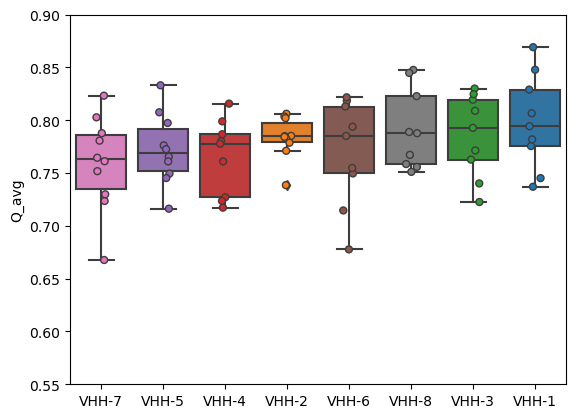

In [2]:
def get_mean(csv_f):
    df=pd.read_csv(csv_f)
    return df.iloc[:,1:].mean().to_frame().T
Q_l = sorted([ i for i in os.listdir('./') if 'Q_rep' in i])
df_Q_l = [get_mean(i) for i in Q_l]
new_df_Q = pd.concat(df_Q_l)
print(new_df_Q)
new_df_Q.median().T.to_csv('../hmd_q_all_all_median.csv')
meds = new_df_Q.median().sort_values()
new_df_Q = new_df_Q[meds.index]
# new_df_Q.boxplot()
columns_names=['VHH-'+str(i) for i in range(1,9)]
color_names=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
c_map=dict(zip(columns_names,color_names))
ax = sns.boxplot(data=new_df_Q,palette=c_map)
sns.stripplot(data=new_df_Q, ax=ax, linewidth=1,palette=c_map)
plt.ylim(0.55,0.9)
plt.ylabel('Q_avg')

In [47]:
Q_median = new_df_Q.median(axis=0).sort_values(ascending=False).to_frame().T
print(Q_median)
print('>'.join( Q_median.columns))

      VHH-1     VHH-3     VHH-8     VHH-6     VHH-2     VHH-4     VHH-5  \
0  0.794355  0.792805  0.787769  0.785191  0.784664  0.777778  0.769062   

      VHH-7  
0  0.762861  
VHH-1>VHH-3>VHH-8>VHH-6>VHH-2>VHH-4>VHH-5>VHH-7


      VHH-1     VHH-2     VHH-3     VHH-4     VHH-5     VHH-6     VHH-7  \
0  0.469061  0.473949  0.500970  0.513266  0.462699  0.411120  0.488654   
0  0.461687  0.450492  0.450136  0.520430  0.506214  0.416070  0.508838   
0  0.505196  0.497153  0.467711  0.461094  0.454403  0.457398  0.468870   
0       NaN  0.479007  0.519175  0.543085  0.441353       NaN  0.534729   
0  0.402060  0.468883  0.511642  0.455737  0.476773  0.467882  0.500937   
0  0.532678  0.470336  0.445708       NaN  0.496437  0.411573  0.506262   
0  0.489129  0.452080  0.445170  0.501136  0.490812  0.452946  0.518976   
0  0.524660  0.478557       NaN  0.498776  0.563868  0.430758  0.485134   
0  0.440473  0.466586  0.488255  0.473863  0.501333  0.437416  0.521640   
0  0.455448  0.463427  0.477042  0.515981  0.477705  0.452087  0.490008   

      VHH-8  
0  0.489418  
0  0.453072  
0  0.501488  
0  0.494394  
0       NaN  
0  0.537743  
0  0.544751  
0  0.481594  
0  0.515285  
0  0.455164  


Text(0, 0.5, 'hydrophobic_SASA_avg')

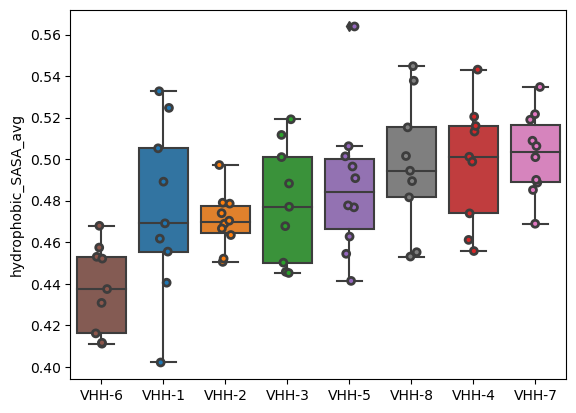

In [3]:
SASA_l = sorted([ i for i in os.listdir('./') if 'SASA_rep' in i])
df_SASA_l = [get_mean(i) for i in SASA_l]
new_df_SASA = pd.concat(df_SASA_l)
print(new_df_SASA)
new_df_SASA.median().T.to_csv('../hmd_SASA_nonpolar_median.csv')
meds = new_df_SASA.median().sort_values()
new_df_SASA = new_df_SASA[meds.index]
# ax = sns.violinplot(data=new_df_SASA)
columns_names=['VHH-'+str(i) for i in range(1,9)]
color_names=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
c_map=dict(zip(columns_names,color_names))
ax = sns.boxplot(data=new_df_SASA,palette=c_map)
sns.stripplot(data=new_df_SASA, ax=ax, linewidth=2,palette=c_map)
plt.ylabel('hydrophobic_SASA_avg')


In [10]:
sasa_median = new_df_SASA.median(axis=0).sort_values(ascending=True).to_frame().T
print(sasa_median)
print('>'.join( sasa_median.columns))

      VHH-6     VHH-1     VHH-2     VHH-3     VHH-5     VHH-8     VHH-4  \
0  0.437416  0.469061  0.469609  0.477042  0.484258  0.494394  0.501136   

    VHH-7  
0  0.5036  
VHH-6>VHH-1>VHH-2>VHH-3>VHH-5>VHH-8>VHH-4>VHH-7


Text(0, 0.5, 'Q')

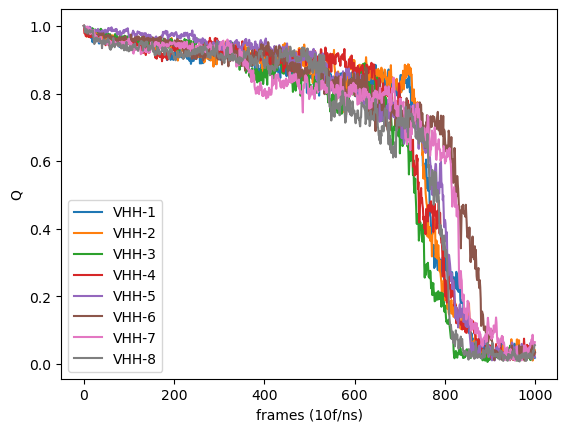

In [11]:
df_Q.iloc[:,1:].plot.line()
plt.xlabel('frames (10f/ns)')
plt.ylabel('Q')

Text(0, 0.5, 'hydrophobic_SASA_mean')

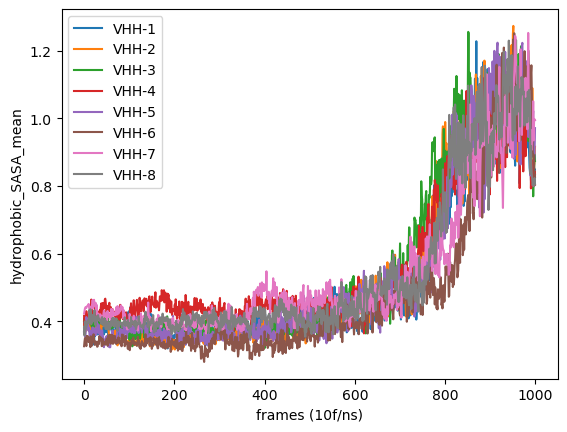

In [12]:
df_hydrophobicSASA.iloc[:,1:].plot.line()
plt.xlabel('frames (10f/ns)')
plt.ylabel('hydrophobic_SASA_mean')

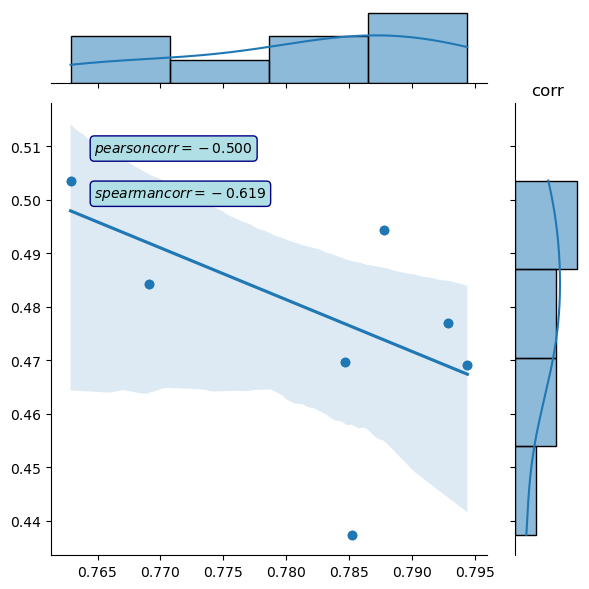

In [36]:
# df_corr = pd.DataFrame()

plt_scatter_corr(list(new_df_Q.median(axis=0)),list(new_df_SASA.median(axis=0)),'corr')


a
